<a href="https://colab.research.google.com/github/Rafat97/bengali-handwritten-digits-0-to-9-classification/blob/master/CSE_4238_Soft_Computing_Lab_Assignment_2_All_in_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Author info
<center>

| |  |
| ----------- | ----------- |
| ![Emdadul Haque Rafat](https://rafat97.github.io/static/c3688eb99d1fef50023a121e3abc5fa6/e8044/my-image.jpg)      | `Name:` Emdadul Haque<br /><br /> `Professional Status:` Student of Computer Science and Engineering <br /><br /> `Email:` rafathaque1997@gmail.com <br /><br /> `Website :` https://rafat97.github.io/ <br /><br />`Github:` https://github.com/Rafat97 <br /><br /> `Linkedin:` https://www.linkedin.com/in/rafat-haque-173131139/   |

</center>

# Drive mount code

In [ ]:
from google.colab import drive
drive.mount('./drive')

# Dataset Creation

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

In [ ]:
!gdown --id 1txyKhs1Zt5AKswGGK9VI_jE0JNHuQT85

In [ ]:
!unzip '/content/Dataset A.zip'

## Read `csv` file

In [ ]:
!rm -rf '/content/PROCESSED_DATASET-170104028'

In [ ]:
traning_csv = '/content/training-a.csv'
read_df = pd.read_csv(traning_csv)

In [ ]:
read_df.columns

In [ ]:
number_of_digit_class = 10
for i in range(0,number_of_digit_class):
  select_digit = read_df[read_df['digit'] == i]
  print(i , select_digit.shape )

## Dataset processed & store into `digit` based folder

In [ ]:
number_of_digit_class = read_df['digit'].nunique()

DATASET_ROOT_DIR = './PROCESSED_DATASET_170104028/' 
path = Path(DATASET_ROOT_DIR)
path.mkdir(parents=True, exist_ok=True)
DATASET_ROOT_DIR = os.path.abspath(path)

for i in range(0,number_of_digit_class):
  select_digit = read_df[read_df['digit'] == i]
  for index,val in select_digit.iterrows():
    file_relative_path_from= f"./{val['database name']}/{val['filename']}"
    file_relative_dir_to = f"{DATASET_ROOT_DIR}/{val['digit']}"
    Path(file_relative_dir_to).mkdir(parents=True, exist_ok=True)
    shutil.copy(file_relative_path_from, file_relative_dir_to)
    print(file_relative_path_from , file_relative_dir_to , "OK")

## Check Image is correct

In [ ]:
#@title #<center>All images are correct or not using pytorch `ImageFolder`</center> { display-mode: "form" }
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np

train_transforms = transforms.Compose([
        # transforms.RandomResizedCrop(256),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
      ])

img_path = '/content/PROCESSED_DATASET-170104028'  #@param {type: "string"}
train_dataset=datasets.ImageFolder(root=img_path,transform=train_transforms)
print( train_dataset.class_to_idx )
dataloaders = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=False,pin_memory=True)
for image,label in dataloaders:

  plt.figure(figsize=(20,20))
  grid_imge_gen = torchvision.utils.make_grid(image)
  plt.imshow(grid_imge_gen.permute(1, 2, 0).cpu())
  plt.show()
  print(label)
  # break

## Create dataset zip

In [ ]:
ZIP_FILE_NAME = 'PROCESSED_DATASET-170104028.zip'
!zip -r $ZIP_FILE_NAME 'PROCESSED_DATASET-170104028/'

## Copy the zip file into drive or safe place 

In [ ]:
!cp '/content/PROCESSED_DATASET-170104028.zip'  '/content/drive/MyDrive/Datasets'

# Data Load From zip

In [49]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


## Download preprocessed dataset

In [50]:
!gdown --id '1cml-H4UUJyY0hRoVeAynO8JjvWqa7FU1'

Downloading...
From: https://drive.google.com/uc?id=1cml-H4UUJyY0hRoVeAynO8JjvWqa7FU1
To: /content/PROCESSED_DATASET-170104028.zip
816MB [00:14, 54.9MB/s]


## Unzip the download dataset

In [51]:
!unzip '/content/PROCESSED_DATASET-170104028.zip'

Archive:  /content/PROCESSED_DATASET-170104028.zip
replace PROCESSED_DATASET-170104028/5/a14515.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Remove the zip file

In [52]:
!rm '/content/PROCESSED_DATASET-170104028.zip'

# Import packages

In [53]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


# important variables

In [54]:
base_dir = '/content/PROCESSED_DATASET-170104028' 
BATCH_SIZE = 32

# 28(model-1), 128(model-2), 224(model-3),
IMAGE_SIZE = 224
LEARNING_RATE = 0.01
TEST_SIZE = 0.2
OUTPUT_DIM=10

# Load Dataset 

In [55]:
transform = transforms.Compose([
                                # transforms.ToPILImage(),

                                ## this is only for when model is 1
                                # transforms.Grayscale(), 
                                
                                # transforms.RandomRotation(20,expand=True), ## adding random rotation 20deg
                                # torchvision.transforms.ColorJitter(hue=.05, saturation=.05), ## adding color filter
                                # transforms.RandomVerticalFlip(), ## adding vertical flip
                                # transforms.RandomHorizontalFlip(), ## adding horizontal flip
                                transforms.Resize(IMAGE_SIZE),  ## image resize
                                transforms.CenterCrop(IMAGE_SIZE), ## image center crop
                                transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

#load training dataset 
dataset = torchvision.datasets.ImageFolder(base_dir, transform=transform)
n = len(dataset) 
n_test = int(TEST_SIZE * n) # 10% validation
trainDataset, validDataSet = torch.utils.data.random_split(dataset,[n - n_test,n_test]) #random split dataset
trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
validationloader = torch.utils.data.DataLoader(validDataSet, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

Length of the trainloader: 15776
Length of the validationloader: 3968


In [56]:

# trainDataset = torchvision.datasets.FashionMNIST(root='./data', 
#                             train=True, 
#                             transform=transforms.ToTensor(),  # Normalize the image to [0-1] from [0-255]
#                             download=True)

# validDataSet = torchvision.datasets.FashionMNIST(root='./data', 
#                            train=False, 
#                            transform=transforms.ToTensor())

# '''
# MAKING DATASET ITERABLE
# '''

# trainloader = torch.utils.data.DataLoader(dataset=trainDataset, 
#                                            batch_size=BATCH_SIZE, 
#                                            shuffle=True)   # It's better to shuffle the whole training dataset! 

# validationloader = torch.utils.data.DataLoader(dataset=validDataSet, 
#                                           batch_size=BATCH_SIZE, 
#                                           shuffle=False)  

# print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
# print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

# Data basic info.

In [ ]:
dataset.class_to_idx # class map

In [ ]:
print(dict(Counter(dataset.targets))) # count number of data in a class

In [ ]:
train_classes = [label for _, label in trainDataset]
print(dict(Counter(train_classes)))

In [ ]:
val_classes = [label for _, label in validDataSet]
print(dict(Counter(val_classes)))

In [ ]:
for image,label in trainloader:
  plt.figure(figsize=(20,20))
  grid_imge_gen = torchvision.utils.make_grid(image)
  plt.imshow(grid_imge_gen.permute(1, 2, 0).cpu())
  plt.title("Trainloader")
  plt.show()
  print(label)
  break

In [ ]:
for image,label in validationloader:
  plt.figure(figsize=(20,20))
  grid_imge_gen = torchvision.utils.make_grid(image)
  plt.imshow(grid_imge_gen.permute(1, 2, 0).cpu())
  plt.title("Validationloader")
  plt.show()
  print(label)
  break

# Model Creation 

In [57]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Model 1

In [ ]:
'''
Model creation 
'''

class LIN_MODEL(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 90)
        self.fc_2 = torch.nn.Linear(90, 50)
        self.fc_3 = torch.nn.Linear(50, 30)
        self.fc_4 = torch.nn.Linear(30, 18)
        self.fc_5 = torch.nn.Linear(18, 12)
        self.fc_6 = torch.nn.Linear(12, outDim)

        self.linear = torch.nn.Linear(784, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.softmax(self.fc_2(x),dim=1)
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.softmax(self.fc_4(x),dim=1)
        x = torch.nn.functional.relu(self.fc_5(x))
        x = self.fc_6(x)
        # x = torch.nn.functional.softmax(self.linear(x),dim=1)
        return x
        

model_1 = LIN_MODEL(OUTPUT_DIM).to(device)

summary( model_1, input_size=(1, 28, 28))
# select CPU or GPU as a device
print(model_1)


In [ ]:
x = torch.randn(BATCH_SIZE,1,28,28).to(device)
make_dot(model_1(x), params=dict(model_1.named_parameters()), show_attrs=True, show_saved=True)

In [ ]:
make_dot(model_1(x), params=dict(model_1.named_parameters()), show_attrs=True, show_saved=True).render("Model-1", format="png")

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=LEARNING_RATE, )

## Model 1 v2

In [ ]:
class LIN_MODEL_2(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_2, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 742)
        self.fc_2 = torch.nn.Linear(742, 621)
        self.fc_3 = torch.nn.Linear(621, 510)
        self.fc_6 = torch.nn.Linear(510, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.relu(self.fc_2(x))
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.relu(self.fc_6(x))

        return x
        
model_1_2 = LIN_MODEL_2(OUTPUT_DIM).to(device)

summary( model_1_2, input_size=(1, 28, 28))
# select CPU or GPU as a device
print(model_1_2)


In [ ]:
x = torch.randn(BATCH_SIZE,1,28,28).to(device)
make_dot(model_1_2(x), params=dict(model_1_2.named_parameters()), show_attrs=True, show_saved=True)

In [ ]:
make_dot(model_1_2(x), params=dict(model_1_2.named_parameters()), show_attrs=True, show_saved=True).render("Model-1-2", format="png")

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1_2.parameters(),lr=LEARNING_RATE, )

## Model 1 V3

In [ ]:
class LIN_MODEL_3(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_3, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 512)
        self.fc_2 = torch.nn.Linear(512, 256)
        self.fc_6 = torch.nn.Linear(256, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.relu(self.fc_2(x))
        x = torch.nn.functional.relu(self.fc_6(x))

        return x
        
model_1_3 = LIN_MODEL_3(OUTPUT_DIM).to(device)

summary( model_1_3, input_size=(1, 28, 28))
print(model_1_3)


In [ ]:
x = torch.randn(BATCH_SIZE,1,28,28).to(device)
make_dot(model_1_3(x), params=dict(model_1_3.named_parameters()), show_attrs=True, show_saved=True)

In [ ]:
make_dot(model_1_3(x), params=dict(model_1_3.named_parameters()), show_attrs=True, show_saved=True).render("Model-1-3", format="png")

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1_3.parameters(),lr=LEARNING_RATE, )

## Model 2


In [ ]:
class CNN(torch.nn.Module): 
    def __init__(self ,outDim):
        super(CNN, self).__init__()

        #initializing convolution layer
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)

        #initializing dropout 
        self.dropout = torch.nn.Dropout(0.2)

        #initializing dropout 
        self.pool= torch.nn.MaxPool2d(2,2)
 
        #initializing linear
        self.fc1 = torch.nn.Linear(32* 30* 30, 512)
        self.fc2 = torch.nn.Linear(512,64)
        self.fc3 = torch.nn.Linear(64,10)

 
    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.nn.functional.relu(self.conv2(x))) 
        x = self.dropout(x)
        x = x.view(-1, 32* 30* 30) 
        # print(x.shape)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

model_2 = CNN(OUTPUT_DIM).to(device)

summary( model_2, input_size=(3, 128, 128))
# select CPU or GPU as a device
print(model_2)


In [ ]:
x = torch.randn(1,3,128,128).to(device)
make_dot(model_2(x), params=dict(model_2.named_parameters()), show_attrs=True, show_saved=True)

In [ ]:
make_dot(model_2(x), params=dict(model_2.named_parameters()), show_attrs=True, show_saved=True).render("Model-2-CNN", format="png")

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=LEARNING_RATE, )

## Model 3

In [58]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

      
num_classes = OUTPUT_DIM


model_3 = models.resnet152(pretrained=True)
set_parameter_requires_grad(model_3, True)
num_ftrs = model_3.fc.in_features
model_3.fc = torch.nn.Linear(num_ftrs, num_classes)

model_3 = model_3.to(device)

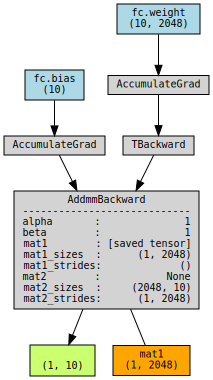

In [59]:
x = torch.randn(1,3,224,224).to(device)
make_dot(model_3(x), params=dict(model_3.named_parameters()), show_attrs=True, show_saved=True)

In [60]:
make_dot(model_3(x), params=dict(model_3.named_parameters()), show_attrs=True, show_saved=True).render("Model-3-RSNET-152", format="png")

'Model-3-RSNET-152.png'

In [61]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=LEARNING_RATE, )

# Start Tranning

## Save Model

In [62]:
def save_model(
               MODEL_USED,
               SAVEPATH,
               epoch, 
               batch_size, 
               model,
               optimizer,
               image_size,
               tranning_loss=[],
               tranning_acc=[],
               validation_loss=[],
               validation_acc=[],
               learning_rate=0.001,
               meta_data=None):
  SAVEPATH += f"{MODEL_USED}-checkpoint-epoch-{epoch}.pt"
  save_obj = {
       'MODEL_USED':MODEL_USED,
       'batch_size':batch_size,
       'epoch': epoch,
       'model_full': model,
       'optimizer_full': optimizer,
       'model_state': model.state_dict(),
       'optimizer_state': optimizer.state_dict(),
       'image_size': image_size,
       'tranning_loss': tranning_loss,
       'tranning_acc': tranning_acc,
       'validation_loss': validation_loss,
       'validation_acc': validation_acc,
       'learning_rate':learning_rate,
       'meta_data':meta_data
       }

  torch.save(save_obj, SAVEPATH)

## Train function

In [63]:
def train_model(start, end, 
                model_used ,
                model_save_path, 
                model, 
                criterion, 
                optimizer, 
                dataloaders,
                testloaders , 
                lernRate=0.001,
                all_tranning_loss=[], all_validation_loss=[], all_tranning_accuracy=[], all_validation_accuracy=[]):
    since = time.time()
    num_epochs = end
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    phase = 'train'
    steps = 0

    for epoch in range(start,num_epochs):
          model.train()
          phase = 'tranning'
          print('Epoch {}/{}'.format(epoch, num_epochs - 1))
          print('-' * 10)
          running_loss = 0.0
          running_corrects = 0

          for i,(inputs, labels) in enumerate(dataloaders):
                
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

                # running_loss += loss.item() * inputs.size(0)
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels.data)
                

                print_val = f"Epoch: {epoch}/{num_epochs-1} Steps {steps} \t"
                print_val += f"running_loss : {(loss.item()):.6f}\t"
                print_val += f"running_corrects : {torch.sum(preds == labels.data)}\t"  
                print_val += f"total_corrects : {running_corrects}\t"  
                sys.stdout.write('\r' + str(print_val))
                steps += 1
          
          
          steps = 0
          epoch_loss = running_loss / len(dataloaders)
          epoch_acc = running_corrects.double().item() /len(dataloaders.dataset)
          all_tranning_loss.append(loss.item())
          all_tranning_accuracy.append(epoch_acc)
          
          
          print("\n")
          print("----------------------------Tranning Summary----------------------")
          print('{} Tranning Avg. Loss: {:.4f} Tranning Avg. Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
          print("-"*70)
          print("\n")

          print("Start Validation")
          model.eval()
          with torch.no_grad():
              phase = "validation"
              running_loss = 0.0
              running_corrects = 0
              for i,(inputs, labels) in enumerate(testloaders):
                  inputs, labels = inputs.to(device), labels.to(device)
                  outputs = model(inputs)
                  _, preds = torch.max(outputs, 1)
                  loss = criterion(outputs, labels)
                    
                  running_loss += loss.item()
                  running_corrects += torch.sum(preds == labels.data)  

                  print_val = f"Steps {i} \t"
                  print_val += f"validation_running_loss : {(loss.item()):.6f}\t"
                  print_val += f"validation_running_corrects : {torch.sum(preds == labels.data)}\t"  
                  print_val += f"validation_total_corrects : {running_corrects}\t"  
                  sys.stdout.write('\r' + str(print_val))

              epoch_val_loss = running_loss / len(testloaders)
              epoch_val_acc = running_corrects.double().item() /len(testloaders.dataset)
              all_validation_loss.append(epoch_val_loss)
              all_validation_accuracy.append(epoch_val_acc)

              print()
              print("----------------------------Validation Summary-----------------")
              print('{} Validation Avg. Loss: {:.4f} Validation Avg. Acc: {:.4f}'.format(
                    phase, epoch_val_loss, epoch_val_acc))
              print("------------------------------------------------------------")


          model.train()
          
          print("-------Start Model Save----\n\n")
          save_model(model_used,
                     model_save_path,
                     epoch, 
                     len(dataloaders),
                     model,
                     optimizer,
                     IMAGE_SIZE,
                     tranning_loss=all_tranning_loss,
                     tranning_acc= all_tranning_accuracy,
                     validation_loss=all_validation_loss,
                     validation_acc=all_validation_accuracy,
                     learning_rate=lernRate)
          # break
      
    print("Complete Train")
          ## deep copy the model
          # if phase == 'val' and epoch_acc > best_acc:
          #       best_acc = epoch_acc
          #       best_model_wts = copy.deepcopy(model.state_dict())

    print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    return 

## Start Train

In [64]:
# 1 (26 - 1 * 28 * 28) (own) (FMNIST)
# 1_2 (300 - 1 * 28 * 28) (own) (FMNIST)
# 1_3 (300 - 1 * 28 * 28) (own) (FMNIST)

# 2 (100 - 1 * 128 * 128) (FMNIST) 
# 2 (100 - 1 * 128 * 128) (own) 
# 2 (100 - 3 * 128 * 128) (own) 

# 3 (25 - 1 * 128 * 128) (FMNIST) 


In [65]:
!mkdir 'EXP-3-COLOR-OWN'
%cd '/content'

mkdir: cannot create directory ‘EXP-3-COLOR-OWN’: File exists
/content


In [66]:
from pathlib import Path

START=0
model_save_path = './EXP-3-COLOR-OWN/' # must give `/` for the folder directory

model_used= 'EXPERIMENT_MODEL_3_RSNET_COLOR'
# model_ft = model_1
# model_ft = model_1_2
# model_ft = model_1_3
# model_ft = model_2
model_ft = model_3
optimizer_ft = optimizer
all_tranning_loss = [];
all_validation_loss = [];
all_tranning_accuracy = []; 
all_validation_accuracy = [];

load_saved_model='/content/EXP-1-2-OWN/EXPERIMENT_MODEL_1_2-checkpoint-epoch-187.pt'
p = Path(load_saved_model)
if len(load_saved_model) > 1 and p.exists():
  loadedModel = torch.load(load_saved_model, map_location=device)
  model_used = loadedModel['MODEL_USED']
  model_ft =  loadedModel['model_full']
  model_ft.load_state_dict(loadedModel['model_state'])
  optimizer_ft = loadedModel['optimizer_full']
  optimizer_ft.load_state_dict(loadedModel['optimizer_state'] )
  START = loadedModel['epoch'] + 1 
  all_tranning_loss = loadedModel['tranning_loss'] 
  all_validation_loss = loadedModel['validation_loss'] 
  all_tranning_accuracy = loadedModel['tranning_acc'] 
  all_validation_accuracy = loadedModel['validation_acc']

END=25
trainloader= trainloader
testloader = validationloader

In [67]:
train_model(START, END,model_used, model_save_path, model_ft, criterion, optimizer_ft, trainloader, testloader, 
            0.01,
            all_tranning_loss, 
            all_validation_loss, 
            all_tranning_accuracy, 
            all_validation_accuracy)

Epoch 0/24
----------
Epoch: 0/24 Steps 0 	running_loss : 2.278082	running_corrects : 2	total_corrects : 2	

KeyboardInterrupt: ignored

In [ ]:
# !cp  '/content/drive/MyDrive/MY_COURSE/4.2/CSE-4238-Soft Computuing/Assignment 2/OWN/EXP-1-2-OWN.zip' './'
# !unzip '/content/EXP-1-2-OWN.zip' 

In [ ]:
# !mkdir 'EXP-2'

In [ ]:
!zip -r 'EXP-3-COLOR-OWN.zip' 'EXP-3-COLOR-OWN' 

In [ ]:
# !mv '/content/EXPERIMENT_MODEL_2-checkpoint-epoch-26.pt' '/content/EXP-2'

In [ ]:
# !rm -rf '/content/EXP-1/EXP-1/drive/MyDrive/MY_COURSE/4.2/CSE-4238-Soft Computuing/Assignment 2/EXP-1/drive'

In [ ]:
!cp -rfv '/content/EXP-1-3-OWN.zip'  '/content/drive/Shareddrives/Test shared drive'

In [ ]:
!cp -rfv '/content/EXP-1-3-OWN.zip'  '/content/drive/MyDrive/MY_COURSE/4.2/CSE-4238-Soft Computuing/Assignment 2/OWN'

In [ ]:
# class CNN(torch.nn.Module): 
#     def __init__(self):
#         super(CNN, self).__init__()

#         #initializing 4 convolution layer
#         self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
#         self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
#         self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=128, kernel_size=3)
#         self.conv4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4)

#         #initializing dropout 
#         self.dropout = torch.nn.Dropout(0.2)

#         #initializing dropout 
#         self.pool= torch.nn.MaxPool2d(2,2)
 
#         #initializing linear 
#         self.fc1 = torch.nn.Linear(256 * 5 * 5, 512)
#         self.fc2 = torch.nn.Linear(512, 64)
#         self.fc3 = torch.nn.Linear(64, 32)
#         self.fc4 = torch.nn.Linear(32, 10)
 
#     def forward(self, x):
#         x = self.pool(torch.nn.functional.relu(self.conv1(x))) #sending input into 1st convolution layer,then to relu ,then to pooling layer , param = ((3*3*3)+1)*16 = 448
#         x = self.pool(torch.nn.functional.relu(self.conv2(x))) #sending previous output into 2nd convolution layer,then to relu ,then to pooling layer, param = ((3*3*16)+1)*32 = 4640 
#         x = self.dropout(x) #dropout unnecessary output
#         x = self.pool(torch.nn.functional.relu(self.conv3(x)))
#         x = self.pool(torch.nn.functional.relu(self.conv4(x)))
#         x = self.dropout(x)
#         x = x.view(-1, 256 * 5 * 5) # for flatten layer
#         x = torch.nn.functional.relu(self.fc1(x))
#         x = torch.nn.functional.relu(self.fc2(x))
#         x = torch.nn.functional.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x
        
# #select CPU or GPU as a device
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device
# model = CNN().to(device)
# print(model)

# Classification Performance Metrics

In [ ]:
# import some importent library or packages 
import glob,sys,os
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sn
import pandas as pd
import pathlib
import zipfile
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

## Download Model

In [ ]:
# !gdown --id 1bhegwtIpwAYCsnptXoYrSEmuEObyMq4Y ## insecptionV3 without as output
# https://drive.google.com/file/d/1bwC7yVaHFsLmyiQFExewVkt33DeuhLpm/view?usp=sharing
# https://drive.google.com/file/d/10jt7Oe7RrFtNWvsY1eQTRPS2nCNqmCnB/view?usp=sharing
# https://drive.google.com/file/d/10s3Cln4xLViOizFxe1HHkSYKjq7_A_3X/view?usp=sharing
# https://drive.google.com/file/d/1GQpI5HSHF_cg8mvBsBxc89ohSa5fDqEv/view?usp=sharing
# https://drive.google.com/file/d/1-8AKgpmaqLDT5K6CGmfZ-SrgC5vtxqYG/view?usp=sharing
# https://drive.google.com/file/d/1VLPrGSLzQBbL_G1rTufcs7EmMZ_YJGH-/view?usp=sharing

# https://drive.google.com/file/d/1IxM0bieCLAaWWe_r67sd_Jz-oS8qXVfN/view?usp=sharing
# https://drive.google.com/file/d/1-8x2xQQ0NOxpkF1MMe0k2Sz-PjnAS8Lc/view?usp=sharing
# https://drive.google.com/file/d/1LwOS_LP56Pm1xcbjXRzf_EYClpz167PK/view?usp=sharing
# https://drive.google.com/file/d/1qpsII4q2Xk1mdSrS3KW4K8Pe7ugY8rs3/view?usp=sharing
# https://drive.google.com/file/d/1-7a44W76z-joINkLC_0ffcdBkPkRY_y8/view?usp=sharing

# https://drive.google.com/file/d/1PBTq5xRgadmgc_MocZIHGhCFY80QBAg2/view?usp=sharing
# https://drive.google.com/file/d/1-92tqY9DwsAHgUikt5B_9dMPc7Oq1sWH/view?usp=sharing
# https://drive.google.com/file/d/1VzWoWbjjMeptGSLgqqBxSdwiQ28CFmp9/view?usp=sharing
# https://drive.google.com/file/d/1K73sdUVBVx29VX8cBABH0AInev920sT0/view?usp=sharing
!gdown --id 1K73sdUVBVx29VX8cBABH0AInev920sT0

In [ ]:
!rm -rf  '/content/MODEL'
!mkdir '/content/MODEL'
!unzip -u '/content/EXP-3-FMINST.zip' -d '/content/MODEL'

## Model Load

In [ ]:
class LIN_MODEL(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 90)
        self.fc_2 = torch.nn.Linear(90, 50)
        self.fc_3 = torch.nn.Linear(50, 30)
        self.fc_4 = torch.nn.Linear(30, 18)
        self.fc_5 = torch.nn.Linear(18, 12)
        self.fc_6 = torch.nn.Linear(12, outDim)

        self.linear = torch.nn.Linear(784, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.softmax(self.fc_2(x),dim=1)
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.softmax(self.fc_4(x),dim=1)
        x = torch.nn.functional.relu(self.fc_5(x))
        x = self.fc_6(x)
        # x = torch.nn.functional.softmax(self.linear(x),dim=1)
        return x


class LIN_MODEL_2(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_2, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 742)
        self.fc_2 = torch.nn.Linear(742, 621)
        self.fc_3 = torch.nn.Linear(621, 510)
        self.fc_6 = torch.nn.Linear(510, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.relu(self.fc_2(x))
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.relu(self.fc_6(x))

        return x


class LIN_MODEL_3(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_3, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 512)
        self.fc_2 = torch.nn.Linear(512, 256)
        self.fc_6 = torch.nn.Linear(256, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.relu(self.fc_2(x))
        x = torch.nn.functional.relu(self.fc_6(x))

        return x

class CNN(torch.nn.Module): 
    def __init__(self ,outDim):
        super(CNN, self).__init__()

        #initializing convolution layer
        # self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)

        #initializing dropout 
        self.dropout = torch.nn.Dropout(0.2)

        #initializing dropout 
        self.pool= torch.nn.MaxPool2d(2,2)
 
        #initializing linear
        self.fc1 = torch.nn.Linear(32* 30* 30, 512)
        self.fc2 = torch.nn.Linear(512,64)
        self.fc3 = torch.nn.Linear(64,10)

 
    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.nn.functional.relu(self.conv2(x))) 
        x = self.dropout(x)
        x = x.view(-1, 32* 30* 30) 
        # print(x.shape)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x            

In [ ]:
MODEL_LOAD_PATH = '/content/MODEL/EXP-3-FMINST/EXPERIMENT_MODEL_3-checkpoint-epoch-24.pt'
model = torch.load(MODEL_LOAD_PATH,map_location='cpu')
model

## All the loss and accuracy

In [ ]:
_tranning_loss = model['tranning_loss']
_tranning_acc = model['tranning_acc']
_validation_loss = model['validation_loss']
_validation_acc = model['validation_acc']

In [ ]:
plt.figure(figsize=(10,5))
plt.title("LOSS Exp-2 Model-3 FMINIST")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Exp-2 Model-3 FMINIST")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Load test dataset

In [ ]:

IMAGE_SIZE = model['image_size'] ## set image height width to 128x128
transform = transforms.Compose([
                                # transforms.ToPILImage(),

                                ## this is only for when model is 1
                                transforms.Grayscale(), 
                                
                                # transforms.RandomRotation(20,expand=True), ## adding random rotation 20deg
                                # torchvision.transforms.ColorJitter(hue=.05, saturation=.05), ## adding color filter
                                # transforms.RandomVerticalFlip(), ## adding vertical flip
                                # transforms.RandomHorizontalFlip(), ## adding horizontal flip
                                transforms.Resize(IMAGE_SIZE),  ## image resize
                                transforms.CenterCrop(IMAGE_SIZE), ## image center crop
                                transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
trainDataset = torchvision.datasets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transform,  # Normalize the image to [0-1] from [0-255]
                            download=True)

validDataSet = torchvision.datasets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transform)

'''
MAKING DATASET ITERABLE
'''

trainloader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=1, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

testloader = torch.utils.data.DataLoader(dataset=validDataSet, 
                                          batch_size=1, 
                                          shuffle=False)  

print("Length of the trainloader:", len(trainloader ) * 1)
print("Length of the validationloader:", len(testloader ) * 1)

In [ ]:
# # BATCH_SIZE = 32 ## number of image batch size 
# base_dir = '/content/PROCESSED_DATASET-170104028' 
# TEST_SIZE = 0.2
# IMAGE_SIZE = model['image_size'] ## set image height width to 128x128
# transform = transforms.Compose([
#                                 # transforms.ToPILImage(),

#                                 ## this is only for when model is 1
#                                 transforms.Grayscale(), 
                                
#                                 # transforms.RandomRotation(20,expand=True), ## adding random rotation 20deg
#                                 # torchvision.transforms.ColorJitter(hue=.05, saturation=.05), ## adding color filter
#                                 # transforms.RandomVerticalFlip(), ## adding vertical flip
#                                 # transforms.RandomHorizontalFlip(), ## adding horizontal flip
#                                 transforms.Resize(IMAGE_SIZE),  ## image resize
#                                 transforms.CenterCrop(IMAGE_SIZE), ## image center crop
#                                 transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
#                                 # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                                ])

# #load training dataset 
# dataset = torchvision.datasets.ImageFolder(base_dir, transform=transform)
# n = len(dataset) 
# n_test = int(TEST_SIZE * n) # 10% validation
# trainDataset, validDataSet = torch.utils.data.random_split(dataset,[n - n_test,n_test]) #random split dataset
# trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=1, shuffle=True, pin_memory=True,) 
# testloader = torch.utils.data.DataLoader(validDataSet, batch_size=1, shuffle=True, pin_memory=True,) 
# print("Length of the trainloader:", len(trainloader ) * 1)
# print("Length of the validationloader:", len(testloader ) * 1)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Load model with state

In [ ]:
preTrainedModel = model['model_full']
preTrainedModel.load_state_dict( model['model_state'])

## Model prediction  

In [ ]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
preTrainedModel.eval()
for i,(inputs, labels) in enumerate(testloader):

  inputs, labels = inputs.to(device), labels.to(device)
  outputs = preTrainedModel(inputs)
  _, preds = torch.max(outputs, 1)
  y_true_tensor = torch.cat((y_true_tensor,labels))
  y_pred_tensor = torch.cat((y_pred_tensor,preds))
  print(i)
  # break


In [ ]:
# Convert tensor to list
y_true = y_true_tensor.tolist()
y_pred = y_pred_tensor.tolist()

## Confusion matrix

In [ ]:
matrice = confusion_matrix(y_true,y_pred)
matrice

In [ ]:

## FOR F-MNIST
target_names = list(validDataSet.class_to_idx.keys())
df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
plt.figure(figsize=(15,15))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix {model['MODEL_USED']}")
plt.show()


## FOR OWN
# target_names = list(dataset.class_to_idx.keys())
# df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
# plt.figure(figsize=(15,15))
# sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
# plt.title(f"Confusion matrix {model['MODEL_USED']}")
# plt.show()

## Classification Report `recision,  recall,  f1-score`

In [ ]:
## FOR FNIMST
target_names = list(validDataSet.class_to_idx.keys())
classify_report = classification_report(y_true, y_pred, target_names=target_names)
print(classify_report)


## FOR OWN
# target_names = list(dataset.class_to_idx.keys())
# classify_report = classification_report(y_true, y_pred, target_names=target_names)
# print(classify_report)
